In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
data = pd.read_csv('model_ready_match_data.csv')
data.head()
data = data.drop(["pass_percent", "shot_percent", 'tackle_percent'], axis=1)

In [3]:
X = data.drop("result", axis=1)
y = data.result

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.730
k: 3, Train/Test Score: 0.865/0.757
k: 5, Train/Test Score: 0.839/0.765
k: 7, Train/Test Score: 0.826/0.773
k: 9, Train/Test Score: 0.818/0.778
k: 11, Train/Test Score: 0.815/0.780
k: 13, Train/Test Score: 0.811/0.784
k: 15, Train/Test Score: 0.810/0.786
k: 17, Train/Test Score: 0.808/0.787
k: 19, Train/Test Score: 0.807/0.789


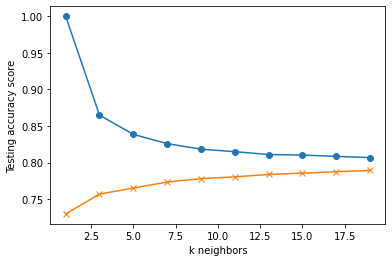

In [7]:
# Graph to show identify optimal K value (7)
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [8]:
# knn_model = KNeighborsClassifier(n_neighbors=13)
# knn_model.fit(X_train_scaled, y_train)
# print("k=13 Test Acc: %.3f" % knn_model.score(X_test_scaled, y_test))

In [9]:
# y_pred_knn = knn_model.predict(X_test_scaled)
# cm_knn = confusion_matrix(y_test, y_pred_knn)
# print(cm_knn)

In [10]:
# print(classification_report(y_test, y_pred_knn))